In [1]:
from Peakfit import Fitter

In [2]:
import numpy as np
2*np.sqrt(2*np.log(2))

2.3548200450309493

In [3]:
Bob = Fitter()

[0, 10, 0, 1]
[0, 10, 0, 1]


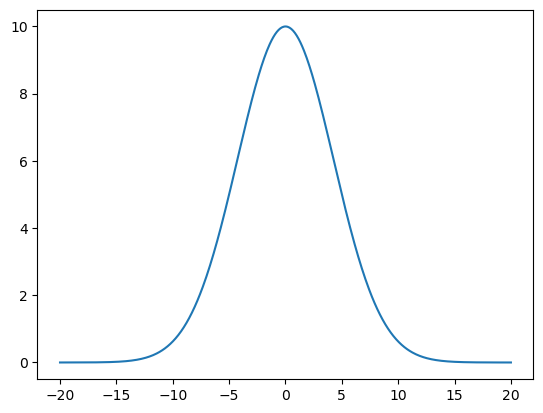

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
x = np.linspace(-20,20,500)
args = Bob.getargs()
print(args)
y = Bob.fitfunct(x,args)
plt.plot(x,y)

In [1]:
Bob.A


NameError: name 'Bob' is not defined

In [ ]:
#Message in a bottle 